# Numpy
NumPy-based algorithms are generally **10 to 100 times faster** (or more) than their pure Python counterparts and **use significantly less memory**.

In [2]:
import numpy as np

## Array Creation

In [ ]:
# my_list = list(range(1000000)) # Took more than 3 minutes
my_arr = np.arange(1000000) # Took only 0.023 seconds

# print(my_list)
print(my_arr)

[     0      1      2 ... 999997 999998 999999]


In [ ]:

arr1 = np.array([1,2,3,4]) #1d array
print(arr1)
print("-----------------")

arr2 = np.array([[1,2,3,4],[5,6,7,8]]) #2d array
print(arr2)
print("-----------------")

arr3 = np.array([[[1,2],[3,4],[5,6]]]) #3d array
print(arr3)
print("-----------------")

[1 2 3 4]
-----------------
[[1 2 3 4]
 [5 6 7 8]]
-----------------
[[[1 2]
  [3 4]
  [5 6]]]
-----------------


In [ ]:
# Array of Zeros

zeros = np.zeros(5) #1d array of 5 zeros
zeros2D = np.zeros((3,4)) # 2d array of zeros , 3x4 size of array

#Array of Ones
ones = np.ones((2,3))
print(ones)

#Identity Array
print("======> Identity Array: ")
identity = np.eye(3)
print(identity)

# Array with a constant integer
print("======> Scalar Array: ")
scalar = np.full((2,3), 7)
print(scalar)

#Random Value Array
print("======> Random Values Array: ")
identity = np.random.random((2,2)) # Values are [0, 1) - Between 0 (inclusive) and 1 (exlusive)
print(identity)

[[1. 1. 1.]
 [1. 1. 1.]]
======> Identity Array: 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
======> Scalar Array: 
[[7 7 7]
 [7 7 7]]
======> Random Values Array: 
[[0.9784094  0.94510242]
 [0.85847246 0.9225766 ]]


## Array Properties

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

print("Array:", arr)
print("Shape:", arr.shape)      # Dimensions: (2, 3)
print("Number of dimensions:", arr.ndim)  # 2
print("Number of elements:", arr.size)    # 6
print("Data type:", arr.dtype)  # int64 (depends on system)
print("Number of Bytes:", arr.nbytes)  # Each element - 8 bytes (depends on system)

Array: [[1 2 3]
 [4 5 6]]
Shape: (2, 3)
Number of dimensions: 2
Number of elements: 6
Data type: int64
Number of Bytes: 48


## Array Integer Indexing and Slicing

**Syntax:** sequence[start:stop:step]

* **step:** The number of elements to skip between each selection. Meaning, how much to increment the iterator. It always starts from the zeroth index, after that, it increments the iterator according to the set step. A step of 1 means you select every element by incrementing the iterator as i++, a step of 2 means you select every second element with i+= 2, and so on. If omitted, the default step is 1 as i++.
  * You can make the iterator to start from the last index by using negative value. As ::-1, this will move backwards till the zeroth index is reached.

Slicing works identically for both lists and strings.



In [ ]:
arr = np.array([10, 20, 30, 40, 50])

print(arr[0])    # Output: 10 (first element)
print(arr[-1])   # Output: 50 (last element)
print(arr[1:4])  # Output: [20 30 40] (slicing)
# You can also use arr[:2, 1:3].copy() to avoid referencing the original array

arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(arr[0, 0])     # Output: 1 (row 0, column 0)
print(arr[1, 2])     # Output: 6 (row 1, column 2)
print(arr[0:2, 1:3]) # Output: [[2 3] [5 6]] (slicing)

10
50
[20 30 40]
1
6
[[2 3]
 [5 6]]


Two ways of accessing the data in the middle row of the array.
**Mixing integer indexing** with slices yields an array of **lower rank**,
while using **only slices yields** an array of the **same rank** as the
original array:

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(a[1, :2]) # Rank 1: (rows (1), columns (0, 1))
print()
print(a[1:3, :2]) # Rank 2 (original rank): (rows (1, 2), columns (0, 1))
print()
print(a[[0, 1], :]) # Rank 2 (original rank): (rows (0, 1), columns (0, 1, 2))

[4 5]

[[4 5]
 [7 8]]

[[1 2 3]
 [4 5 6]]


In [ ]:
arr = np.array([[1,2], [3,4], [5,6]])
print(arr[[0,2], :]) # Custom slicing
print()
print(arr[-1:0:-1, :]) # Sequencial slicing
print()
print(arr[-1:0:-1, ::-1]) # Reverse columns

[[1 2]
 [5 6]]

[[5 6]
 [3 4]]

[[6 5]
 [4 3]]


In [ ]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]]) # Rank 2

# We use a colon ':' in the first dimension to select all rows.
# For the second dimension, we use '-1' to select the last column.
last_column = a[:, -1] # Shape (3,) - Rank 1
print("Rank Decreased: ")
print(last_column)
# But this will return an array with a lower rank due to mixing INTEGER INDEXING with SLICING.
last_column = a[:, -1:] # Shape (3, 1) - Rank 2
print("The last column is:")
print(last_column)

# We access the middle row using index 1 (since arrays are 0-indexed).
# Then, we use slicing to get the last two elements of that row.
# The syntax '[-2:]' means "start at the second-to-last element and go to the end".
last_two_elements_of_middle_array = a[1, -2:] # Shape (2,) - Rank 1
print("\nThe last 2 elements of the middle array are:")
print(last_two_elements_of_middle_array)

Rank Decreased: 
[3 6 9]
The last column is:
[[3]
 [6]
 [9]]

The last 2 elements of the middle array are:
[5 6]


If you assign a scalar value to a slice, as in **arr[5:8] = 12**, the value is
propagated (or broadcasted) to the entire selection.

In [ ]:
arr = np.arange(10)
print(arr) # [0 1 2 3 4 5 6 7 8 9]
print(arr[5]) #5
print(arr[5:8]) #[5 6 7]
arr[5:8] = 12
print(arr) #[ 0 1 2 3 4 12 12 12 8 9]

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


An important first distinction from Python’s built-in lists is that array slices are
views on the original array.
This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [ ]:
arr = np.arange(10)
print(arr) # [0 1 2 3 4 5 6 7 8 9]

arr_slice = arr[5:8]
print(arr_slice) # [5 6 7]
arr_slice[1] = 12345
print(arr_slice) # [5 12345 7]

print()

print(arr) # [ 0 1 2 3 4 5 12345 7 8 9]
arr_slice[:] = 64
print(arr) # [ 0 1 2 3 4 64 64 64 8 9]

[0 1 2 3 4 5 6 7 8 9]
[5 6 7]
[    5 12345     7]

[    0     1     2     3     4     5 12345     7     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


The syntax [start:stop:step] is used for slicing sequences like **lists, tuples, and strings**. This notation allows you to extract a portion of a sequence, creating a new sequence containing elements from the original.

In [ ]:
my_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Basic slice: elements from index 2 up to (but not including) index 7
print(my_list[2:7])  # Output: [2, 3, 4, 5, 6]

# Slice from the beginning to index 5
print(my_list[:5])   # Output: [0, 1, 2, 3, 4]

# Slice from index 5 to the end
print(my_list[5:])   # Output: [5, 6, 7, 8, 9]

# Slice with a step of 2: every other element
print(my_list[::2])  # Output: [0, 2, 4, 6, 8]

# Reverse the list
print(my_list[::-1]) # Output: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Reverse a portion of the list
print(my_list[7:2:-1]) # Output: [7, 6, 5, 4, 3]

# Get every third letter from a string starting from index 1
my_string = "abcdefghi"
print(my_string[1::3]) # Output: "beh"

[2, 3, 4, 5, 6]
[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[7, 6, 5, 4, 3]
beh


## Boolean Indexing


In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6])

# Create a boolean mask
mask = arr > 3
print(mask)  # Output: [False False False True True True]

# Use the mask to filter elements
print(arr[mask])  # Output: [4 5 6]

# One-line version
print(arr[arr > 3])  # Output: [4 5 6]
print(arr[(arr > 3) & (arr < 6)])  # Output: [4 5]
print(arr[(arr < 3) | (arr > 5)])  # Output: [1 2 6]

[False False False  True  True  True]
[4 5 6]
[4 5 6]
[4 5]
[1 2 6]


In [ ]:
a = np.array([1, 3, 5, 7, 9, 11, 13])
print(a[(a > 2) & (a < 11)])

# Elements that are divisible by 3
print(a[a%3==0])

[3 5 7 9]
[3 9]


Comparisons between **arrays of the same size** yield boolean arrays:

In [ ]:
arr1 = np.array([10, 20, 30, 40])
arr2 = np.array([15, 20, 25, 45])

# Element-wise comparison for equality
result_equal = arr1 == arr2
print("Equality comparison (arr1 == arr2):", result_equal)

# Element-wise comparison for greater than
result_greater = arr1 > arr2
print("Greater than comparison (arr1 > arr2):", result_greater)

# Element-wise comparison for less than or equal to
result_less_equal = arr1 <= arr2
print("Less than or equal comparison (arr1 <= arr2):", result_less_equal)

Equality comparison (arr1 == arr2): [False  True False False]
Greater than comparison (arr1 > arr2): [False False  True False]
Less than or equal comparison (arr1 <= arr2): [ True  True False  True]


## Arithmetic Operations
You can't do direct arithmetic operations on **lists** in Python like you would with numbers. Using standard operators like +, -, *, or / on lists will not perform element-wise calculations. Instead, they will either concatenate, repeat, or raise a TypeError.



In [20]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(a + b)   # Output: [5 7 9] (Element-wise addition)
print(a - b)   # Output: [-3 -3 -3] (Subtraction)
print(a * b)   # Output: [4 10 18] (Multiplication)
print(a / b)   # Output: [0.25 0.4 0.5] (Float Division)
print(a // b)   # Output: [0 0 0] (Integer Division)
print(a ** 2)  # Output: [1 4 9] (Square)

[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]
[0 0 0]
[1 4 9]


Arithmetic operations with **scalars** propagate the scalar argument to each element
in the array:

In [ ]:
# Create a NumPy array
arr = np.array([1, 2, 3, 4])

# Add a scalar to the array
result_add = arr + 5
print(f"Addition: {result_add}")

# Subtract a scalar from the array
result_subtract = arr - 2
print(f"Subtraction: {result_subtract}")

# Multiply the array by a scalar
result_multiply = arr * 3
print(f"Multiplication: {result_multiply}")

# Divide the array by a scalar
result_divide = arr / 2
print(f"Division: {result_divide}")

# Raise each element of the array to a scalar power
result_power = arr ** 2
print(f"Power: {result_power}")

Addition: [6 7 8 9]
Subtraction: [-1  0  1  2]
Multiplication: [ 3  6  9 12]
Division: [0.5 1.  1.5 2. ]
Power: [ 1  4  9 16]


## Reshaping Arrays

In [23]:
arr = np.arange(12)  # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# ValueError: cannot reshape array of size 12 into shape (3,5)
# reshaped = arr.reshape(3, 5)
# Reshape to 3x4 matrix
reshaped = arr.reshape(3, 4)
print(reshaped)
# Output:
# [[ 0  1  2  3]
#  [ 4  5  6  7]
#  [ 8  9 10 11]]

# Flatten back to 1D
flattened = reshaped.flatten()
print("\nFlat:", flattened)  # Back to original
print("------------------------------------------------------")
reshaped.reshape(1, 12) # 2D

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Flat: [ 0  1  2  3  4  5  6  7  8  9 10 11]
------------------------------------------------------


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[:2,:3])

[[1 2 3]
 [4 5 6]]


## 4D Array

In [ ]:
arr4D = np.ones((2,2,3,4))
# This means: 2 "outer" arrays, each containing 2 "middle" arrays,
# each containing 3 "inner" arrays, each containing 4 elements.
arr4D

array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]],


       [[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]])

## Broadcasting

* **Enabling Element-wise Operations:** Broadcasting allows element-wise operations (like addition, subtraction, multiplication) between arrays even if their shapes are not identical.
* **Virtual Expansion:** Instead of physically copying data to create arrays of matching shapes, NumPy virtually expands the smaller array to align with the larger array's dimensions, making them compatible for the operation. This saves memory and computational resources.

* **Broadcasting Rules:**
  * **Dimension Compatibility:** For two arrays to be broadcastable, their dimensions must be compatible when checked from right to left in shape (2, 3, 3, 4).
  * **Compatibility Conditions:** Dimensions are compatible if:
    * They are equal in last dimension (1D). OR
    * One of the last dimension is 1.
  * **Prepending Dimensions of Size 1:** If arrays have a different number of dimensions, NumPy implicitly prepends dimensions of size 1 to the smaller array to match the number of dimensions of the larger array.


In this case, NumPy effectively "broadcasts" the number 5 to become an array of [5, 5, 5] to match the shape of arr.

In [ ]:
arr = np.array([1, 2, 3]) # 1d array (3, ) - Last dimension is 3
result = arr + 5 # 1D (1, ) - Last dimension is 1,
# so it is stretched to [5, 5, 5]

# Broadcast successful because the last dimension is 1 for 5
print(result) # Output: [6 7 8]

arr5 = np.array([5]) # (1, )
# Broadcast successful because the last dimension is 1 for [5]
result = arr + arr5
print(result) # Output: [6 7 8]

[6 7 8]
[6 7 8]


In [ ]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])  # Shape: (2, 3)

# vector = np.array([10, 20, 30, 40, 50, 60])
# ValueError: operands could not be broadcast together with shapes (2,3) (6,)
# result = matrix + vector
# The last dimension of the matrix is 3, and the last dimension of the vector is 6. They are not equal, and neither is 1. Because the last dimensions are incompatible, broadcasting fails, and a ValueError is raised.
# The vector shape must match the number of columns in the matrix.

# ValueError: operands could not be broadcast together with shapes (2,3) (2,)
# vector = np.array([10, 20])  # Shape: (2,)

vector = np.array([10, 20, 30])  # Shape: (3,)

# NumPy aligns the shapes:
# martix: (2, 3)
# vector: (2, 3) - The leading dimension is broadcast to 2
# In this example, the 1D array vector is conceptually "stretched" down to a 2D array of the shape (2, 3) by repeating its values, allowing the element-wise addition to take place.

result = matrix + vector
print(result)

# In this example, the vector (shape (3,)) is broadcast across the rows of the matrix (shape (2, 3)). NumPy effectively treats the vector as if it were a 2D array with shape (1, 3) and then expands it along the first dimension to (2, 3) to match the matrix's shape, allowing for element-wise addition. The output would be:

[[11 22 33]
 [14 25 36]]


**Broadcasting** applies operations on arrays of different shapes (or array and a
scalar), however, there are certain rules
* Array sizes must be compatible

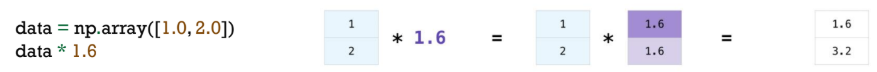

## Slicing a 3D Array
The fundamental syntax for 3D slicing is array[depth_slice, row_slice, column_slice]. The slices are specified as start:stop:step, where you can omit any part to use its default value.

Let's use a 3D NumPy array as an example. We'll create a simple one with a shape of (2, 3, 4). This means it has 2 layers (depth), 3 rows, and 4 columns.



In [ ]:
# Create a 3D array with shape (2, 3, 4)
# This represents 2 "slices" or "layers", each with a 3x4 grid
arr_3d = np.array([
    # First layer (index 0)
    [[0,  1,  2,  3],
     [4,  5,  6,  7],
     [8,  9, 10, 11]],

    # Second layer (index 1)
    [[12, 13, 14, 15],
     [16, 17, 18, 19],
     [20, 21, 22, 23]]
])

print("Original 3D Array:")
print(arr_3d)

Original 3D Array:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


**Basic Slicing Examples**
* **Select a specific layer:**
To get the second layer, you'd select index 1 for the first dimension.



In [ ]:
# Select the second layer (index 1)
layer_2 = arr_3d[1, :, :] # Rank 2
layer_2_3d = arr_3d[1:2, :, :] # Rank 3 - This references original array
print("\nSecond Layer:")
print(layer_2)
print("\nSecond Layer in 3d:")
print(layer_2_3d)

# Note: The colon : is a wildcard that selects all elements along that dimension. [:, :] can be omitted, as it's the default behavior.
layer_2 = arr_3d[1] # Rank 2
print("\nSecond Layer:")
print(layer_2)


Second Layer:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

Second Layer in 3d:
[[[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

Second Layer:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


* **Select a specific row from all layers:**
To get the second row from both layers, you'd slice the first and second dimensions.



In [ ]:
# Select the second row (index 1) across all layers
row_2 = arr_3d[:, 1, :]
print("\nSecond Row from All Layers:") # Rank 2
print(row_2)


Second Row from All Layers:
[[ 4  5  6  7]
 [16 17 18 19]]


* **Select a sub-block of the array:**
You can specify a range for each dimension. For example, let's select a 2x2 sub-grid from the first layer, starting at the second row and third column.



In [ ]:
# Select a 2x2 sub-block from the first layer
# arr_3d[layer_slice, row_slice, column_slice]
sub_block = arr_3d[0, 1:, -2:]
print("\nSub-block from the First Layer:")
print(sub_block)


Sub-block from the First Layer:
[[ 6  7]
 [10 11]]


* **Using step values:**
You can use a step value to skip elements. For example, let's select every other row from every other layer.


In [ ]:
# Original 3D Array:
# [[[ 0  1  2  3]
#   [ 4  5  6  7]
#   [ 8  9 10 11]]

#  [[12 13 14 15]
#   [16 17 18 19]
#   [20 21 22 23]]]

# Select every other layer and every other row, all columns
sliced = arr_3d[::2, ::2, :]
# Select every layer, every other row, all columns
sliced_2 = arr_3d[:, ::2, :]
print("\nSliced with a step of 2:")
print(sliced)
print("\nSliced with a step of 2 with all layers:")
print(sliced_2)


Sliced with a step of 2:
[[[ 0  1  2  3]
  [ 8  9 10 11]]]

Sliced with a step of 2 with all layers:
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [20 21 22 23]]]


## Slicing a 4D Array

In [ ]:
arr_4d = np.random.randint(0, 100, size=(2, 2, 4, 5))
print("Original 4D Array:")
print(arr_4d)

Original 4D Array:
[[[[26  3 56 84 78]
   [98 80 73 81 80]
   [42 81 13 90 25]
   [58 13 74  0  9]]

  [[62 20 88 92 65]
   [90 40 64 16  1]
   [71 48 29  2 90]
   [74 98 34 98 67]]]


 [[[39 61 31  1 63]
   [92 85 16  7 81]
   [ 6  3  3 91 25]
   [83  2 45 22 76]]

  [[87 34 10 92 87]
   [86 65  5 60 23]
   [57  8 88 22 33]
   [72 35 48 57  7]]]]


In [ ]:
# 4D, 3D, 2D, 1D
# Layer 0, Layer 1, Layer 1, all elements
print(arr_4d[0, 1, 1:2, :]) # Rank 2 - Slices used at upto 2D
print("Shape: ", arr_4d[0, 1, 1:2, :].shape)
print()
print(arr_4d[0, 1, 1, :]) # Rank 1 - Slices used at upto 1D
print("Shape: ", arr_4d[0, 1, 1, :].shape)
print('----------------------------------------------')
print(arr_4d[::2, -1:, ::-1, ::1]) # Rank 4 - Slicing used at all 4 indexes
print("Shape: ", arr_4d[::2, -1:, ::-1, ::1].shape)
print()
print(arr_4d[0, -1, ::-1, ::1]) # Rank 2 - Slicing used at 2 indexes
print("Shape: ", arr_4d[0, -1, ::-1, ::1].shape)

[[90 40 64 16  1]]
Shape:  (1, 5)

[90 40 64 16  1]
Shape:  (5,)
----------------------------------------------
[[[[74 98 34 98 67]
   [71 48 29  2 90]
   [90 40 64 16  1]
   [62 20 88 92 65]]]]
Shape:  (1, 1, 4, 5)

[[74 98 34 98 67]
 [71 48 29  2 90]
 [90 40 64 16  1]
 [62 20 88 92 65]]
Shape:  (4, 5)


In [ ]:
# shape (2, 3, 2, 4)
arr = np.array([
    [[[1,2,3,4],
      [5,6,7,8]],
     [[9,10,11,12],
      [13,14,15,16]],
     [[17,18,19,20],
      [21,22,23,24]]],

    [[[25,26,27,28],
      [29,30,31,32]],
     [[33,34,35,36],
      [37,38,39,40]],
     [[41,42,43,44],
      [45,46,47,48]]]
])

print(arr[0, :2, :, :]) # shape (2, 2, 4) - 3D
print("-----------------------")
# due to advanced indexing [0,-1], the selected columns dimension moves forward.
print(arr[0, :2, :, [0, -1]]) # shape (2, 2, 2) -
print("-----------------------")
print(arr[0, :2, 0, [0, -1]]) # shape (2, 1, 2) - 2D

[[[ 1  2  3  4]
  [ 5  6  7  8]]

 [[ 9 10 11 12]
  [13 14 15 16]]]
-----------------------
[[[ 1  5]
  [ 9 13]]

 [[ 4  8]
  [12 16]]]
-----------------------
[[ 1  9]
 [ 4 12]]


In [ ]:
#shape (2, 2, 4)
arr = np.array([
    [
        [1,2,3,4],
        [5,6,7,8]
      ],
     [
        [9,10,11,12],
        [13,14,15,16]
      ]
])

print(arr[:, :, [1, 2]])
print("--------------")
print(arr[0, :, [1, 2]])

[[[ 2  3]
  [ 6  7]]

 [[10 11]
  [14 15]]]
--------------
[[2 6]
 [3 7]]


In [ ]:
#shape (2, 2, 4)
arr = np.array([
    [
        [1,2,3,4],
        [5,6,7,8],
        [9,10,11,12]
      ],
     [
        [13,14,15,16],
        [17,18,19,20],
        [21,22,23,24]
      ]
])

print(arr[:, :, [1, 2]]) # shape (2, 3, 2)
print("--------------")
print(arr[0, :, [1, 2]])

[[[ 2  3]
  [ 6  7]
  [10 11]]

 [[14 15]
  [18 19]
  [22 23]]]
--------------
[[ 2  6 10]
 [ 3  7 11]]


## Numpy Functions

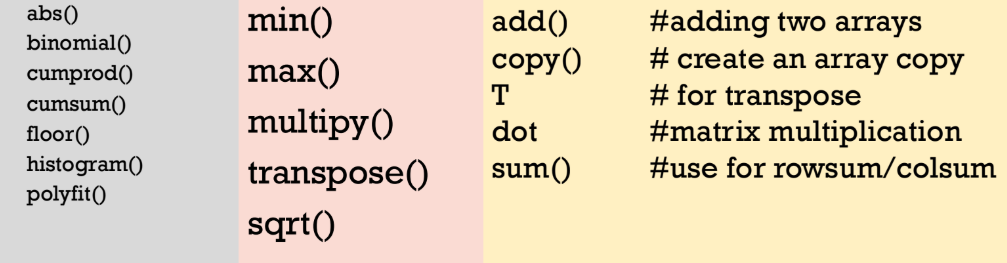